## Daniel Hedji
### V00887395

In this assignment I had compared the Hamiltonian equations to known analytic solutions for a spring mass system. I initially decided to create a function that numerically integrated Hamilton's equations of motion for this problem, and generalized it so that it would accept any initial values for $\ x_0$ and $\ v_0$. From there I used the equation $p=mv$ to plot the x-direction momentum and the position as a function of time for the varying cases. To compare the results to analytically found results, I had used the formula $ma = -kx$ and had planned to solve that through the Scipy package. In order to solve this using the function odeint from Scipy, I needed to make the function first order, so I had made a substitution for x that allowed that. From there I applied the odeint solver for each case and plotted my results.

In [321]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [322]:
#Constants
m = 1 #in kg
k = 100 #N/m
T = 2*np.pi*np.sqrt(m/k) #in s
T

0.6283185307179586

In [375]:
LTs = T / 20 #Large time-steps; made to increment 20 times in 1 oscillation
STs = LTs / 15 #Small time-steps; a bit smaller than a factor of 10 of the large time steps
print(LTs, "seconds")
print(STs, "seconds")

0.031415926535897934 seconds
0.0020943951023931957 seconds


In [376]:
def H_eom(T,Ts,x0,v0,m,k):
    t_tot = T * 10 #total time to run; approximately 1 minute
    t = 0
    count = 0 #Counter set up to count the increments
    #Initial conditions for the x and px lists
    x = [x0]
    px = [m*v0]
    #Here I am limiting the time so that is doesn't exceed 10 oscillations
    while t < t_tot:
        #Integrating the Hamiltonian eom
        x_new = x[-1] + Ts * (px[-1] / m)
        px_new = px[-1] - k * x[-1] * Ts  
        #Adding the values to thei respective lists
        x.append(x_new)
        px.append(px_new)
        #Increment time and counter
        t += Ts
        count += 1
        
    return [x,px,count]

In [377]:
#Creating a function that represents the resulting ODE after applying Newton's Laws
def func_x(x,t,w_squared):
    v1,x1 = x
    return [-x1 * w_squared,v1]

### a)

In [378]:
#Choosing an arbitrary initial position
x0 = 0.5 #in m
v0 = 0
x,p, count = H_eom(T,LTs,x0,v0,m,k)

In [379]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions to be passed into the analytic function, func_x, above
x0s = [x0,v0]
#Solves the ODE; the first column represents the x solutions, while the second column represents the velocity
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

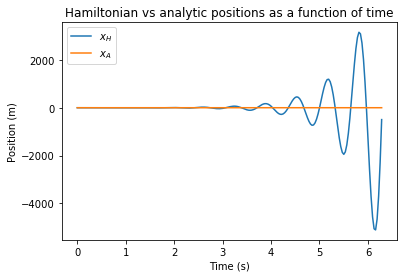

In [380]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

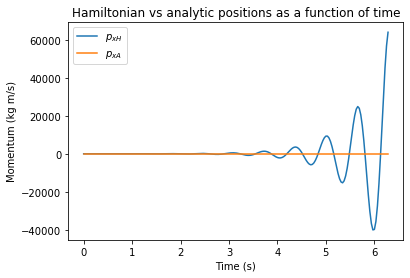

In [381]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

### b)

In [382]:
#Arbitrarily chosen positions and initial veloctities
x0 = 0.5 #in m
v0 = 1 #in m/s
x,p, count = H_eom(T,LTs,x0,v0,m,k)

In [383]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions changed accordingly
x0s = [x0,v0]
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

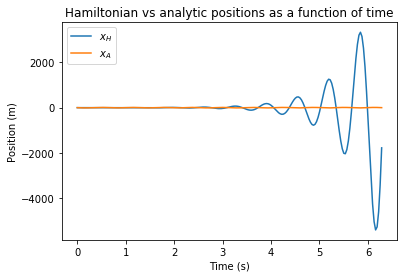

In [384]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

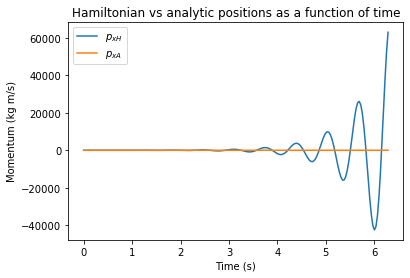

In [385]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

### c)

In [386]:
x0 = 0 #in m
v0 = 1 #in m/s
x,p, count = H_eom(T,LTs,x0,v0,m,k)

In [387]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions changed accordingly
x0s = [x0,v0]
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

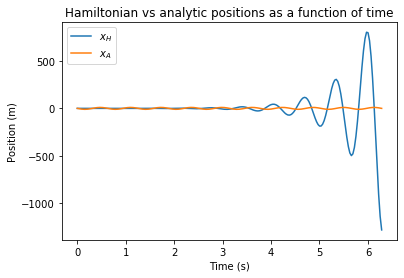

In [388]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

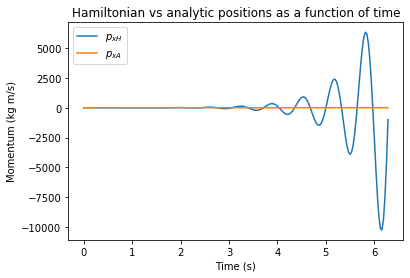

In [389]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

### d)

In [390]:
#Choosing an arbitrary initial position
x0 = 0.5 #in m
v0 = 0
x,p, count = H_eom(T,STs,x0,v0,m,k)

In [391]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions changed accordingly
x0s = [x0,v0]
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

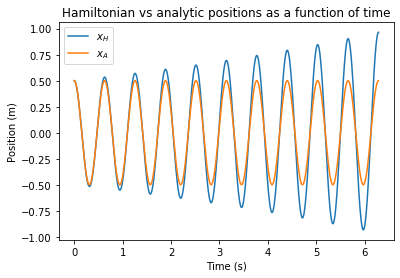

In [392]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

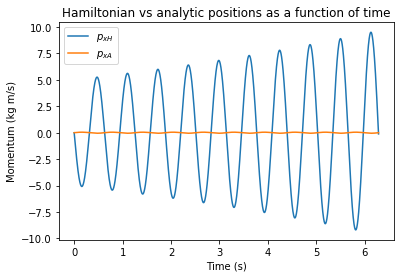

In [393]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

### e)

In [394]:
#Arbitrarily chosen positions and initial veloctities
x0 = 0.5 #in m
v0 = 1 #in m/s
x,p, count = H_eom(T,STs,x0,v0,m,k)

In [395]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions changed accordingly
x0s = [x0,v0]
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

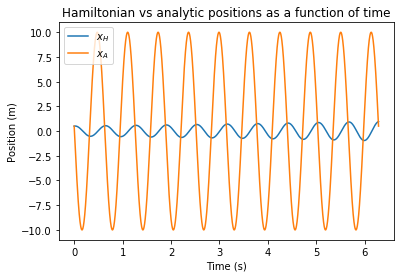

In [396]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

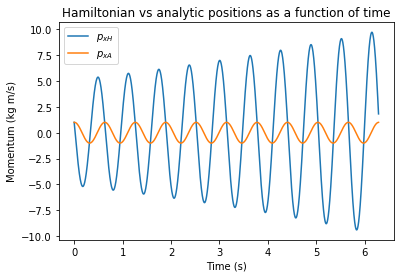

In [397]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

### f)

In [398]:
x0 = 0 #in m
v0 = 1 #in m/s
x,p, count = H_eom(T,STs,x0,v0,m,k)

In [399]:
t = np.linspace(0, T * 10, count+1)
#Initial conditions changed accordingly
x0s = [x0,v0]
sol = integrate.odeint(func_x,x0s,t, args = ((k/m),))

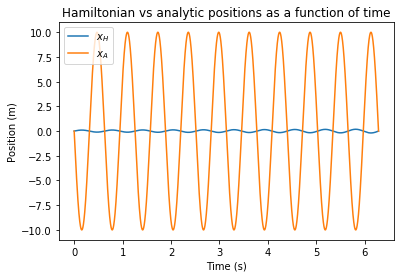

In [400]:
plt.plot(t,x,label = "$x_H$")
plt.plot(t,sol[:, 0], label = "$x_A$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()

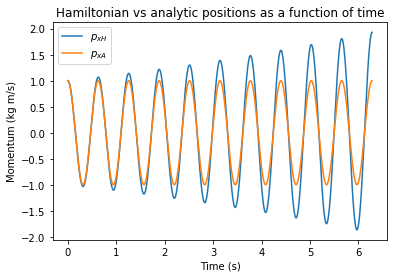

In [401]:
plt.plot(t,p,label = "$p_{xH}$")
plt.plot(t,m * sol[:, 1], label ="$p_{xA}$")
plt.xlabel("Time (s)")
plt.ylabel("Momentum (kg m/s)")
plt.title("Hamiltonian vs analytic positions as a function of time")
plt.legend()